<img src=https://cdn.technadu.com/wp-content/uploads/2020/04/Netflix-Amazon-Prime-Hulu-Disney-Plus-Logos-1536x864.png width="500">

<img src=http://ccb.consejo.org.ar/wp-content/files_mf/cache/th_d15ca006a1f06a08a6ed10efe5d181ed_69920939_2249880648467909_3128855560280080384_n.jpg width="100"> 

In [210]:
#Carga de librerias necesarias para visualizar y realizar el analisis del DS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
import plotly.graph_objects as go
fig = go.Figure()
from wordcloud import WordCloud
import plotly.express as px 
%matplotlib inline

In [211]:
data = pd.read_csv('C:/Users/54115/Desktop/Proyectos EANT/netflix/MoviesOnStreamingPlatforms.csv')
data.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


### Inicio del análisis 

In [212]:
col = data.columns.to_list()
col

['Unnamed: 0',
 'ID',
 'Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

### Se sacan los valores sin nombre ('unnamed: 0' & 'ID')

In [213]:
data.drop(['Unnamed: 0','ID'], axis=1, inplace = True)
col = data.columns.to_list()
col

['Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

In [214]:
data.combine

<bound method DataFrame.combine of                                 Title  Year  Age  IMDb Rotten Tomatoes  \
0                           Inception  2010  13+   8.8             87%   
1                          The Matrix  1999  18+   8.7             87%   
2              Avengers: Infinity War  2018  13+   8.5             84%   
3                  Back to the Future  1985   7+   8.5             96%   
4      The Good, the Bad and the Ugly  1966  18+   8.8             97%   
...                               ...   ...  ...   ...             ...   
16739       The Ghosts of Buxley Hall  1980  NaN   6.2             NaN   
16740                  The Poof Point  2001   7+   4.7             NaN   
16741           Sharks of Lost Island  2013  NaN   5.7             NaN   
16742              Man Among Cheetahs  2017  NaN   6.6             NaN   
16743                In Beaver Valley  1950  NaN   NaN             NaN   

       Netflix  Hulu  Prime Video  Disney+  Type  \
0            1     0    

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            16744 non-null  object 
 1   Year             16744 non-null  int64  
 2   Age              7354 non-null   object 
 3   IMDb             16173 non-null  float64
 4   Rotten Tomatoes  5158 non-null   object 
 5   Netflix          16744 non-null  int64  
 6   Hulu             16744 non-null  int64  
 7   Prime Video      16744 non-null  int64  
 8   Disney+          16744 non-null  int64  
 9   Type             16744 non-null  int64  
 10  Directors        16018 non-null  object 
 11  Genres           16469 non-null  object 
 12  Country          16309 non-null  object 
 13  Language         16145 non-null  object 
 14  Runtime          16152 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.9+ MB


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'IMDb'}>,
        <AxesSubplot:title={'center':'Netflix'}>],
       [<AxesSubplot:title={'center':'Hulu'}>,
        <AxesSubplot:title={'center':'Prime Video'}>,
        <AxesSubplot:title={'center':'Disney+'}>],
       [<AxesSubplot:title={'center':'Type'}>,
        <AxesSubplot:title={'center':'Runtime'}>, <AxesSubplot:>]],
      dtype=object)

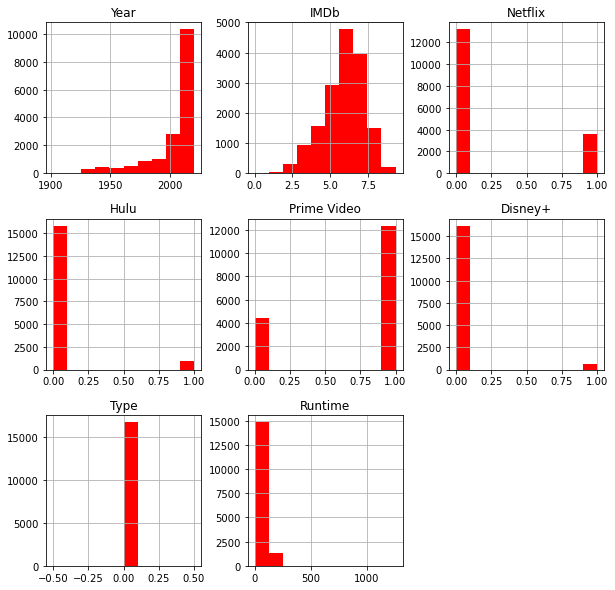

In [216]:
#Observar la distribución de la información.
data.hist(color='red', figsize=(10,10))

### Cantidad de contenido por plataforma

In [217]:
Netflix=data['Netflix'].sum()
print('Cantidad de contenido en Netflix:', Netflix)

Cantidad de contenido en Netflix: 3560


In [218]:
Prime_Video=data['Prime Video'].sum()
print("Cantidad de contenido en Prime Video:",Prime_Video)

Cantidad de contenido en Prime Video: 12354


In [219]:
Hulu=data['Hulu'].sum()
print("Cantidad de contenido de Hulu:",Hulu)

Cantidad de contenido de Hulu: 903


In [220]:
Disney=data['Disney+'].sum()
print("Cantidad de contenido de Disney+:",Disney)

Cantidad de contenido de Disney+: 564


In [221]:
Total_cont=Netflix+Hulu+Prime_Video+Disney
print("Total de contenido en las plataformas online: ", Total_cont)

Total de contenido en las plataformas online:  17381


In [222]:
num_movies = (Netflix,Hulu,Prime_Video,Disney)
col_names = ('Netflix','Hulu','Prime Video','Disney+')
PlatformList = list(zip(col_names,num_movies))
PlatformCounts = pd.DataFrame(data=PlatformList,columns=['Streaming','Cantidad de contenido'])
PlatformCounts

,Streaming,Cantidad de contenido
0,Netflix,3560
1,Hulu,903
2,Prime Video,12354
3,Disney+,564


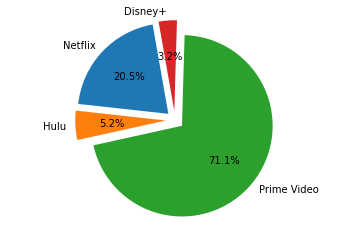

In [223]:
labels = 'Netflix' , 'Hulu', 'Prime Video', 'Disney+'
sizes = [Netflix,Hulu,Prime_Video,Disney]
explode = (0.1, 0.1, 0.1, 0.1 )

fig1 , ax1 = plt.subplots()

ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = False,
        startangle = 100)

ax1.axis ('equal')
plt.show()

### Vigencia del contenido en los servicios de Streaming

In [224]:
print("El contenido de los servicios de Streaming son desde:",data['Year'].min(),"hasta:",data['Year'].max())

El contenido de los servicios de Streaming son desde: 1902 hasta: 2020


### Cantidad de contenido por año

In [225]:
data_year = pd.DataFrame(data.groupby(data['Year']).Title.nunique())
data_year.tail(20)

,Title
Year,
2001,156
2002,193
2003,214
2004,217
2005,285
2006,338
2007,375
2008,442
2009,548


In [226]:
#Mayor cantidad de contenido por año
data_year.nlargest(5,'Title')

,Title
Year,
2017,1401
2018,1285
2016,1206
2015,1065
2014,986


### Prueba de % de datos perdidos

In [227]:
print('Porcentaje de datos perdidos')
(data.isnull().sum()/data.shape[0])*100

Porcentaje de datos perdidos


Title               0.000000
Year                0.000000
Age                56.079790
IMDb                3.410177
Rotten Tomatoes    69.194935
Netflix             0.000000
Hulu                0.000000
Prime Video         0.000000
Disney+             0.000000
Type                0.000000
Directors           4.335882
Genres              1.642379
Country             2.597946
Language            3.577401
Runtime             3.535595
dtype: float64

In [228]:
data.Age.value_counts()

18+    3474
7+     1462
13+    1255
all     843
16+     320
Name: Age, dtype: int64

<AxesSubplot:title={'center':'Contenido hecho por año'}, xlabel='Year'>

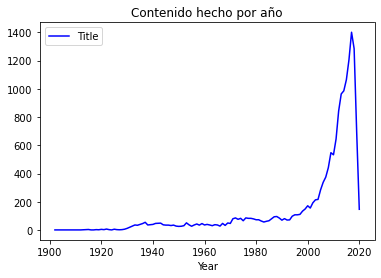

In [229]:
data_year.plot(title='Contenido hecho por año',color='blue',kind='line')

### Eliminación del simbolo '+' oara tener solo el formato numerico segun el caso que corresponde, para la variable 'all' se asigna el valor '0'

In [230]:
age_map = {'18+' :18, '16+' :16,'13+' :13,'7+' :7,'all':0,}
data['intAge'] = data['Age'].map(age_map)

In [231]:
data['intAge']

0        13.0
1        18.0
2        13.0
3         7.0
4        18.0
         ... 
16739     NaN
16740     7.0
16741     NaN
16742     NaN
16743     NaN
Name: intAge, Length: 16744, dtype: float64

In [232]:
data.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,intAge
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,13.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,18.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,13.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,7.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,18.0


### Se procesa la calificación de Rotten Tomatoes

In [233]:
data['Rotten Tomatoes'].value_counts().sort_values(ascending=False)

100%    407
80%     162
50%     136
83%     131
67%     126
       ... 
28%      10
7%       10
4%        9
3%        4
2%        4
Name: Rotten Tomatoes, Length: 99, dtype: int64

In [234]:
data['New_Rotten_Tomatoes'] = data['Rotten Tomatoes'].str.replace("%","")
for i in data['New_Rotten_Tomatoes']:
    if i is str:
        i = i.astype(int)

In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                16744 non-null  object 
 1   Year                 16744 non-null  int64  
 2   Age                  7354 non-null   object 
 3   IMDb                 16173 non-null  float64
 4   Rotten Tomatoes      5158 non-null   object 
 5   Netflix              16744 non-null  int64  
 6   Hulu                 16744 non-null  int64  
 7   Prime Video          16744 non-null  int64  
 8   Disney+              16744 non-null  int64  
 9   Type                 16744 non-null  int64  
 10  Directors            16018 non-null  object 
 11  Genres               16469 non-null  object 
 12  Country              16309 non-null  object 
 13  Language             16145 non-null  object 
 14  Runtime              16152 non-null  float64
 15  intAge               7354 non-null  

In [236]:
data['New_Rotten_Tomatoes']

0         87
1         87
2         84
3         96
4         97
        ... 
16739    NaN
16740    NaN
16741    NaN
16742    NaN
16743    NaN
Name: New_Rotten_Tomatoes, Length: 16744, dtype: object

### Visualizando la data

In [237]:
data['Age'].value_counts().iplot('bar', colors='yellow', xTitle='Grupo etario', 
                                        yTitle='Cantidad de peliculas', 
                                        title="Cantidad de peliculas en cada grupo etario en todos los servicios Streaming")

In [238]:
#The temp object here is a pandas.series object which does not have a 
#iplot method when not linked to plotly. We need cufflinks to link 
#plotly to pandas and add the iplot method

### Observando la cantidad de pelicula en cada grupo etario en Netflix

In [239]:
data_netflix = data.copy()
data_netflix = data_netflix[data['Netflix']==1]
data_netflix['Age'].value_counts().iplot('bar', colors='red', xTitle='Grupo etario', 
                                        yTitle='Cantidad de peliculas', 
                                        title="Cantidad de pelicula en cada grupo etario en Netflix")

In [240]:
data_hulu = data.copy()
data_hulu = data_hulu[data['Hulu']==1]
data_hulu['Age'].value_counts().iplot('bar', colors='green', xTitle='Grupo etario', 
                                        yTitle='cantidad de peliculas', 
                                        title="Cantidad de pelicula en cada grupo etario en HuLu")

In [241]:
data_prime = data.copy()
data_prime = data_prime[data['Prime Video']==1]
data_prime['Age'].value_counts().iplot('bar', colors='grey', xTitle='grupo etario', 
                                        yTitle='Cantidad de peliculas', 
                                        title="Cantidad de pelicula en cada grupo etario en Prime Video")

In [242]:
data_disney = data.copy()
data_disney = data_disney[data['Disney+']==1]
data_disney['Age'].value_counts().iplot('bar', colors='Blue', 
                                        xTitle='Grupo etario', 
                                        yTitle='Cantidad de peliculas', 
                                        title="Cantidad de pelicula en cada grupo etario en Disney+")

#### Si las críticas positivas representan el 60% o más, la película se considera "fresca", ya que una supermayoría de los revisores aprueba la película. Si las críticas positivas son inferiores al 60%, la película se considera "podrida". También se calcula un puntaje promedio en una escala de 0 a 10.

In [243]:
data['Rotten Tomatoes'].value_counts().iplot(kind = 'bar', colors = '#800040', xTitle = "Calificación", yTitle="Cantidad de peliculas", title="Calificaciones de Rotten Tomatoes")

In [244]:
rotten_tomato_scores = pd.DataFrame({'Streaming Service': ["Prime Video", "Hulu","Disney+","NetFlix"],
                                    'Rotten Tomato Score' : [data_prime['Rotten Tomatoes'].value_counts()[0], 
                                                             data_hulu['Rotten Tomatoes'].value_counts()[0],
                                                             data_disney['Rotten Tomatoes'].value_counts()[0],
                                                             data_netflix['Rotten Tomatoes'].value_counts()[0]]})
rotten_tomato_scores.head()

,Streaming Service,Rotten Tomato Score
0,Prime Video,257
1,Hulu,18
2,Disney+,19
3,NetFlix,130


In [245]:
rotten_tomato_scores.sort_values(ascending=False, by="Rotten Tomato Score").iplot(kind='bar', x='Streaming Service', y='Rotten Tomato Score', 
                           color='#800040', xTitle="Servicio streaming", 
                           yTitle="Cantidad de peliculas con 100% calificación", 
                           title="Empresa de Streaming")

### IMDB Ratings

In [246]:
data['IMDb'].value_counts().iplot(kind="bar", color="Yellow", xTitle='IMDb Ratings', yTitle="Cantidad de peliculas", title = "Ratings de iMDB")

In [247]:
def get_imdb_count_per_service(d):
    # This function returns the number of movies in a service having IMDb score greater than 7.5
    num_of_movies = 0
    for key,value in d.items():
        if key>=7.5:
            num_of_movies+=value
    return num_of_movies

In [248]:
imdb_prime_count = get_imdb_count_per_service(dict(data_prime['IMDb'].value_counts().sort_values(ascending=False)))
imdb_hulu_count = get_imdb_count_per_service(dict(data_hulu['IMDb'].value_counts().sort_values(ascending=False)))
imdb_disey_count = get_imdb_count_per_service(dict(data_disney['IMDb'].value_counts().sort_values(ascending=False)))
imdb_netflix_count = get_imdb_count_per_service(dict(data_netflix['IMDb'].value_counts().sort_values(ascending=False)))

imdb_scores = pd.DataFrame({'Streaming Service': ["Prime Video", "Hulu","Disney+","NetFlix"],
                                    'IMDb Score' :[imdb_prime_count, imdb_hulu_count, imdb_disey_count, imdb_netflix_count] })
imdb_scores.head()

,Streaming Service,IMDb Score
0,Prime Video,1104
1,Hulu,97
2,Disney+,89
3,NetFlix,476


In [249]:
imdb_scores.sort_values(ascending=False, by='IMDb Score').iplot(kind="bar", color="purple",x='Streaming Service', 
                  xTitle='Servicio de Streaming', 
                  yTitle="Cantidad de peliculas con 7.5 o mas de calificación", 
                  title = "Servicios de streaming con contenido de 7.5 o mas")

### Directores y sus obras

In [250]:
len(data['Directors'])

16744

In [251]:
director = list(set(data['Directors']))
director.pop(0) #metodo para eliminar los valores NaN
len(director)

11338

In [252]:
#Debido a que hay directores con varias obras se contara la cantidad de obras por cada uno de ellos
new_director = set()
for d in director:
    curr_d = d.split(",")
    for direc in curr_d:
        if direc in new_director:
            continue
        else:
            new_director.add(direc)
len(new_director)

12453

In [253]:
new_director

{'George Sherman',
 'Curtis Von',
 'Einar Gabbassov',
 'Jon Steven Ward',
 'Sergio Castellitto',
 'Joe Lazenby',
 'Franck Ekinci',
 'John Hardwick',
 'Nonny de la Peña',
 'Heather Graham',
 'Dan DeVivo',
 'Michael Rymer',
 'Lewis Gilbert',
 'Gary Michael Schultz',
 'J.S. Wilson',
 'Dover Koshashvili',
 'David W. Warfield',
 'Karl Kozak',
 'Felipe Martínez Amador',
 'Ana Lily Amirpour',
 'Santwana Bardoloi',
 'Matt Vancil',
 'Ji-yeong Jeong',
 'Victress Hitchcock',
 'Dave Schwep',
 'Michael Damian',
 'Takashi Yamazaki',
 'Randy Hill',
 'Chris Nahon',
 'Dirk Simon',
 'Sushil Majumdar',
 'Gab Taraboulsy',
 'Linda Mendoza',
 'Brent Hodge',
 'Anne Misawa',
 'Maciej Dejczer',
 'Mangesh Hadawale',
 'Frank Nissen',
 'Jean-Claude Lord',
 'Clifton Ko',
 'Emily Dell',
 'Jefferson Moore',
 'Jennifer M. Kroot',
 'Reema Kagti',
 'Francesco Rosi',
 'Liza Mandelup',
 'Selçuk Aydemir',
 'Will Zens',
 'Giuliano Carnimeo',
 'Chad Gracia',
 'Mervyn Nelson',
 'Richard Brandes',
 'Brian Klein',
 'Eddie Rome

In [254]:
%%time
new_data = data[data['Directors'].notna()]
directors_count = dict()
direc_in_data = list(new_data['Directors'])
for xdir in direc_in_data:
    curr_dirs = xdir.split(",")
    for xd in curr_dirs:
        if xd in directors_count.keys():
            directors_count[xd] = directors_count.get(xd) + 1
        else:
            directors_count[xd] = 1

Wall time: 248 ms


In [255]:
directors_count_df = pd.DataFrame(directors_count.items(), columns=['Director', 'Count'])
directors_count_df.sort_values(ascending=False, by='Count').head()

,Director,Count
976,Jay Chapman,36
8165,Joseph Kane,31
1102,Cheh Chang,29
4826,Jim Wynorski,23
6949,William Beaudine,23


In [256]:
directors_count_df.sort_values(ascending=False, by='Count')[:20].iplot(kind='bar', 
                                                                  x='Director', 
                                                                  xTitle='Director', 
                                                                  yTitle='Cantidad', colors='Black', 
                                                                  title='Cantidad de obras por director')

In [257]:
data[data['Directors']=='David Fincher']

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,intAge,New_Rotten_Tomatoes
21,The Social Network,2010,13+,7.7,96%,1,0,0,0,0,David Fincher,"Biography,Drama",United States,"English,French",120.0,13.0,96
56,The Curious Case of Benjamin Button,2008,13+,7.8,71%,1,0,0,0,0,David Fincher,"Drama,Fantasy,Romance",United States,"English,Russian,French",166.0,13.0,71
1941,Perdida,2018,18+,5.6,20%,1,0,0,0,0,David Fincher,"Drama,Mystery,Thriller",United States,English,149.0,18.0,20
4449,The Girl with the Dragon Tattoo,2009,18+,7.8,85%,0,0,1,0,0,David Fincher,"Crime,Drama,Mystery,Thriller","United States,Sweden,Norway","English,Swedish",158.0,18.0,85
8990,Find Me,2014,18+,4.5,NaN,0,0,1,0,0,David Fincher,"Drama,Mystery,Thriller",United States,English,149.0,18.0,NaN


In [258]:
data[data['Directors']=='Jay Chapman']

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,intAge,New_Rotten_Tomatoes
1014,Jim Gaffigan: Obsessed,2014,16+,7.6,100%,1,0,0,0,0,Jay Chapman,"Documentary,Comedy",United States,English,60.0,16.0,100
1234,Iliza Shlesinger: War Paint,2013,NaN,6.7,NaN,1,0,1,0,0,Jay Chapman,Comedy,United States,English,75.0,NaN,NaN
1417,Tom Segura: Completely Normal,2014,NaN,7.8,NaN,1,0,1,0,0,Jay Chapman,"Documentary,Comedy",United States,English,74.0,NaN,NaN
2211,Todd Barry: Spicy Honey,2017,NaN,6.7,NaN,1,0,0,0,0,Jay Chapman,Comedy,United States,English,60.0,NaN,NaN
2331,Craig Ferguson: Tickle Fight,2017,NaN,6.6,NaN,1,0,0,0,0,Jay Chapman,Comedy,United States,English,66.0,NaN,NaN
2393,Colin Quinn: Unconstitutional,2015,NaN,7.1,NaN,1,0,1,0,0,Jay Chapman,Comedy,United States,English,55.0,NaN,NaN
2447,Lucas Brothers: On Drugs,2017,NaN,5.5,NaN,1,0,0,0,0,Jay Chapman,Comedy,United States,English,50.0,NaN,NaN
2523,D.L. Hughley: Contrarian,2018,NaN,6.5,NaN,1,0,0,0,0,Jay Chapman,Comedy,United States,English,58.0,NaN,NaN
2636,D.L. Hughley: Clear,2014,NaN,6.7,NaN,1,0,1,0,0,Jay Chapman,Comedy,United States,English,60.0,NaN,NaN
2721,Moshe Kasher: Live in Oakland,2012,NaN,6.8,NaN,1,0,1,0,0,Jay Chapman,Comedy,United States,NaN,61.0,NaN,NaN


### Idioma del contenido

In [259]:
data['Language'].value_counts()

English                        10955
Hindi                            503
English,Spanish                  276
Spanish                          267
English,French                   174
                               ...  
English,Lao                        1
Aramaic,Latin,Hebrew               1
English,French,German,Latin        1
English,Hebrew,German              1
Norwegian,English,French           1
Name: Language, Length: 1102, dtype: int64

En el df la observación idioma 'language' muestra los lenguajes disponibles en cada contenido. Se procesara para segmentar sengun el idioma, la cantidad de peliculas.

In [260]:
%%time
languages_dict = dict(data['Language'].value_counts())
languages = set()
for lang,count in languages_dict.items():
    curr_lang = lang
    curr_langs = curr_lang.split(",")
    for i in curr_langs:
        if i in languages:
            continue
        else:
            languages.add(i.lower())
languages = list(languages)
print("Cantidad de lenguajes : ", len(languages))

#Obteniendo el total de lenguajes en un dataset

Cantidad de lenguajes :  178
Wall time: 23.6 ms


In [261]:
languages_dict

{'English': 10955,
 'Hindi': 503,
 'English,Spanish': 276,
 'Spanish': 267,
 'English,French': 174,
 'Italian': 166,
 'French': 163,
 'Japanese': 155,
 'Mandarin': 151,
 'Tamil': 93,
 'Korean': 90,
 'English,German': 83,
 'German': 76,
 'Hindi,English': 72,
 'Telugu': 67,
 'English,Italian': 67,
 'Turkish': 63,
 'Arabic': 59,
 'Spanish,English': 50,
 'Malayalam': 49,
 'Punjabi': 48,
 'French,English': 48,
 'Marathi': 42,
 'Cantonese': 42,
 'English,Japanese': 41,
 'Filipino,Tagalog': 39,
 'Thai': 35,
 'Portuguese': 34,
 'Indonesian': 34,
 'English,Russian': 31,
 'Russian': 30,
 'English,Mandarin': 30,
 'German,English': 27,
 'Cantonese,Mandarin': 27,
 'Bengali': 25,
 'Italian,English': 24,
 'English,Arabic': 23,
 'Danish': 22,
 'Japanese,English': 21,
 'Mandarin,Cantonese': 21,
 'Dutch': 19,
 'English,Latin': 18,
 'English,Hindi': 18,
 'Swedish': 18,
 'English,Hebrew': 17,
 'English,Korean': 17,
 'English,French,German': 16,
 'Hebrew': 16,
 'Tamil,Telugu': 15,
 'None': 15,
 'English,Po

In [262]:
%%time
languages_count = dict()
for lang,count in languages_dict.items():
    curr_lang = lang.split(",")
    for i in curr_lang:
        if i in languages_count.keys():
            languages_count[i] = languages_count.get(i) + 1
        else:
            languages_count[i] = 1
#Contando la cantidad de lenguajes

Wall time: 8 ms


In [263]:
languages_count

{'English': 785,
 'Hindi': 100,
 'Spanish': 192,
 'French': 279,
 'Italian': 129,
 'Japanese': 87,
 'Mandarin': 92,
 'Tamil': 32,
 'Korean': 49,
 'German': 207,
 'Telugu': 21,
 'Turkish': 27,
 'Arabic': 81,
 'Malayalam': 11,
 'Punjabi': 13,
 'Marathi': 13,
 'Cantonese': 52,
 'Filipino': 19,
 'Tagalog': 18,
 'Thai': 11,
 'Portuguese': 44,
 'Indonesian': 19,
 'Russian': 124,
 'Bengali': 18,
 'Danish': 28,
 'Dutch': 37,
 'Latin': 38,
 'Swedish': 46,
 'Hebrew': 49,
 'None': 4,
 'Chinese': 32,
 'Urdu': 26,
 'Polish': 38,
 'American Sign Language': 6,
 'Kannada': 9,
 'Ukrainian': 17,
 'Greek': 22,
 'Norwegian': 21,
 'Romanian': 16,
 'Finnish': 14,
 'Afrikaans': 13,
 'Irish': 5,
 'Czech': 20,
 'Vietnamese': 13,
 'Aboriginal': 6,
 'Persian': 17,
 'Icelandic': 12,
 'Malay': 12,
 'Hungarian': 15,
 'Gujarati': 8,
 'Serbo-Croatian': 6,
 'Yoruba': 4,
 'Swahili': 10,
 'Bulgarian': 6,
 'Yiddish': 21,
 'Klingon': 3,
 'Min Nan': 7,
 'Swiss German': 12,
 'Catalan': 14,
 'Croatian': 13,
 'Georgian': 5,
 

In [264]:
lang_count_df = pd.DataFrame(languages_count.items(), columns=['Language', 'Count'])
lang_count_df.head()

,Language,Count
0,English,785
1,Hindi,100
2,Spanish,192
3,French,279
4,Italian,129


### Graficando el lenguaje del contenido con respecto a la proporcion

In [265]:
lang_count_df.sort_values(ascending=False, by='Count')[:20].iplot(kind='bar', 
                                                                  x='Language', 
                                                                  xTitle='Lenguaje', 
                                                                  yTitle='Cantidad', colors='Black', 
                                                                  title='Cantidad por idioma')

In [266]:
lang_count_df_copy = lang_count_df[:20]
fig = px.pie(values=lang_count_df_copy['Count'], names=lang_count_df_copy['Language']) 
fig.show()

### Duración del contenido 

In [267]:
pd.DataFrame(dict(data['Runtime'].value_counts().sort_values(ascending=False)[:20]).items(), columns=['Runtime', 'Count']).iplot(kind='bar' ,
                                                                                                                                 x='Runtime', 
                                                                                                                                 xTitle='Duración', 
                                                                                                                                 yTitle='Cantidad', title='Duración del contenido',
                                                                                                                                colors='Black')

### Coicidencias entre los servicios 

In [268]:
true_data = data[data['Netflix']==1]
true_data = true_data[true_data['Prime Video']==1]

true_data

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,intAge,New_Rotten_Tomatoes
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,18.0,97
6,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0,18.0,95
11,3 Idiots,2009,13+,8.4,100%,1,0,1,0,0,Rajkumar Hirani,"Comedy,Drama",India,"Hindi,English",170.0,13.0,100
15,Once Upon a Time in the West,1968,13+,8.5,95%,1,0,1,0,0,Sergio Leone,Western,"Italy,United States","Italian,English,Spanish",165.0,13.0,95
31,Drive,2011,18+,7.8,92%,1,0,1,0,0,Nicolas Winding Refn,"Crime,Drama",United States,"English,Spanish",100.0,18.0,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439,Hisss,2010,NaN,2.8,NaN,1,0,1,0,0,Jennifer Lynch,"Comedy,Drama,Horror,Thriller","India,United States","English,Hindi",98.0,NaN,NaN
3440,Coffee with D,2017,13+,4.4,17%,1,0,1,0,0,Vishal Mishra,Comedy,India,NaN,123.0,13.0,17
3445,Cappuccino,2017,NaN,3.8,NaN,1,0,1,0,0,Jon Amiel,Comedy,"United Kingdom,United States",English,112.0,NaN,NaN
3512,Paradise Lost,2017,NaN,NaN,NaN,1,0,1,0,0,NaN,"Drama,Mystery",NaN,NaN,NaN,NaN,NaN


In [269]:
list(true_data['Title'])

['The Good, the Bad and the Ugly',
 'The Pianist',
 '3 Idiots',
 'Once Upon a Time in the West',
 'Drive',
 'Train to Busan',
 "What's Eating Gilbert Grape",
 'Amy',
 'The Squid and the Whale',
 'Starred Up',
 'The Square',
 'Freedom Writers',
 'The Boy Who Harnessed the Wind',
 'The Rainmaker',
 'The Invitation',
 'The Fundamentals of Caring',
 'The Ring',
 'Trumbo',
 'Patriot Games',
 'Mirage',
 'Kon-Tiki',
 'The Score',
 'Hamburger Hill',
 'Blue Jay',
 "Child's Play",
 'The Christmas Chronicles',
 'Remember',
 'The Interview',
 'Black Snake Moan',
 'Cargo',
 'Girl',
 'Love, Rosie',
 'The Babysitter',
 'The Duchess',
 'Whisky',
 "She's Out of My League",
 'Ittefaq',
 'Retribution',
 'Young Adult',
 'One Day',
 'Elena',
 'Hot Rod',
 'Bandits',
 'Blame!',
 'World Trade Center',
 'I Am Kalam',
 'The First Wives Club',
 'The Angel',
 'Breath',
 'Eye for an Eye',
 'Evolution',
 'After',
 'Kiss the Girls',
 '(T)ERROR',
 'Andaz Apna Apna',
 'Let There Be Light',
 'From Paris with Love',
 'T

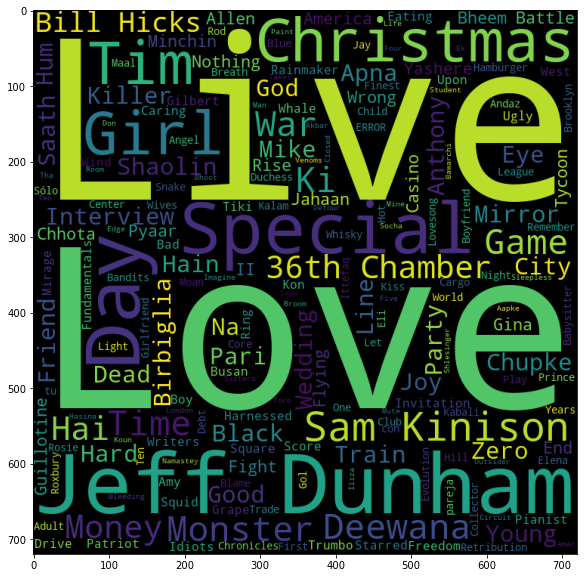

In [270]:
#Se aplica wordcloud para mostrar la relevancia entre los nombres de los titulos de los directores
plt.subplots(figsize = (10,10))

wordcloud = WordCloud (
                    background_color = 'black',
                    width = 720,
                    height = 720
                        ).generate(' '.join(true_data['Title']))
plt.imshow(wordcloud) # mostrar
plt.axis('on') #mezcla la orientacion de las palabras
plt.show()

### Coicidencias del servicio entre Netflix y Hulu

In [271]:
true_data_nh = data[data['Netflix']==1]
true_data_nh = true_data_nh[true_data_nh['Hulu']==1]
list(true_data_nh['Title'])

['Blackfish',
 'Jiro Dreams of Sushi',
 'The Patriot',
 'The Square',
 'Hitch',
 'Hey Arnold! The Jungle Movie',
 'The Interview',
 'Blame!',
 'Evolution',
 'The Oath',
 'Little Monsters',
 'Lost in London',
 'Gemini',
 'No Game No Life: Zero',
 'Major League II',
 'A Second Chance',
 'The Cat in the Hat',
 'Big Time Movie',
 'Zapped',
 'Mother',
 "Escape from Mr. Lemoncello's Library",
 'A Fairly Odd Summer',
 'LeapFrog: Phonics Farm',
 'LeapFrog: Numberland',
 'Oddbods: Party Monsters']

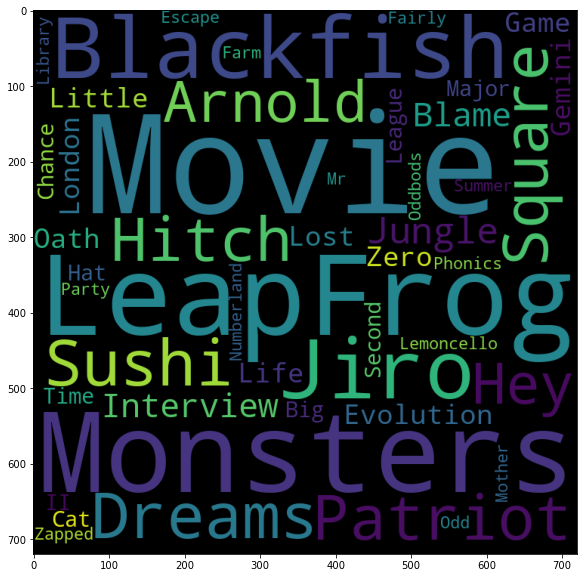

In [272]:
plt.subplots(figsize = (10,10))

wordcloud = WordCloud (
                    background_color = 'black',
                    width = 720,
                    height = 720
                        ).generate(' '.join(true_data_nh['Title']))
plt.imshow(wordcloud) 
plt.axis('on') 
plt.show()

### Coicidencias entre los servicios Prime y Hulu

In [273]:
true_data_ph = data[data['Prime Video']==1]
true_data_ph = true_data_nh[true_data_nh['Hulu']==1]
list(true_data_ph['Title'])

['Blackfish',
 'Jiro Dreams of Sushi',
 'The Patriot',
 'The Square',
 'Hitch',
 'Hey Arnold! The Jungle Movie',
 'The Interview',
 'Blame!',
 'Evolution',
 'The Oath',
 'Little Monsters',
 'Lost in London',
 'Gemini',
 'No Game No Life: Zero',
 'Major League II',
 'A Second Chance',
 'The Cat in the Hat',
 'Big Time Movie',
 'Zapped',
 'Mother',
 "Escape from Mr. Lemoncello's Library",
 'A Fairly Odd Summer',
 'LeapFrog: Phonics Farm',
 'LeapFrog: Numberland',
 'Oddbods: Party Monsters']

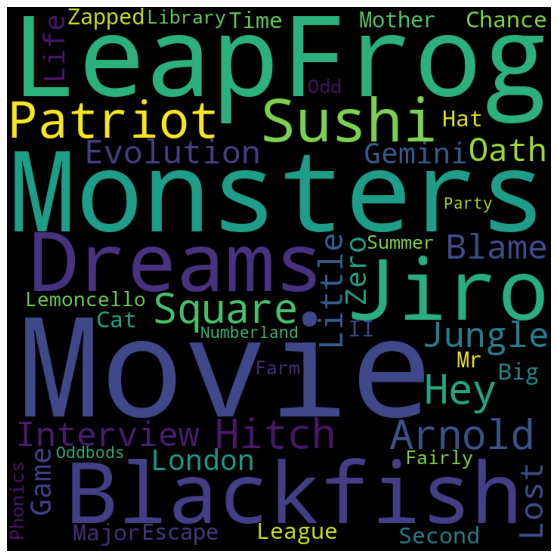

In [274]:
plt.subplots(figsize = (10,10))

wordcloud = WordCloud (
                    background_color = 'black',
                    width = 720,
                    height = 720
                        ).generate(' '.join(true_data_ph['Title']))
plt.imshow(wordcloud)
plt.axis('off') 
plt.show()

### Género de obras

In [275]:
%%time
genres_unclean = dict(data['Genres'].value_counts())
genres = set()
for g,count in genres_unclean.items():
    curr_g = g.split(",")
    for xg in curr_g:
        if xg in genres:
            continue
        else:
            genres.add(xg)

Wall time: 64 ms


In [276]:
%%time
count_genres = dict()
for g,count in genres_unclean.items():
    curr_g = g.split(",")
    for xg in curr_g:
        if xg in count_genres.keys():
            count_genres[xg] = count_genres.get(xg)+1
        else:
            count_genres[xg] = 1

Wall time: 16.3 ms


In [277]:
count_genres_df = pd.DataFrame(count_genres.items(), columns=['Genre', 'Count'])

In [278]:
count_genres_df.sort_values(ascending=False, by='Count').iplot(kind="bar", x='Genre', xTitle='Género', yTitle='Cantidad', title='Cantidad de obras por genero', color='Grey')

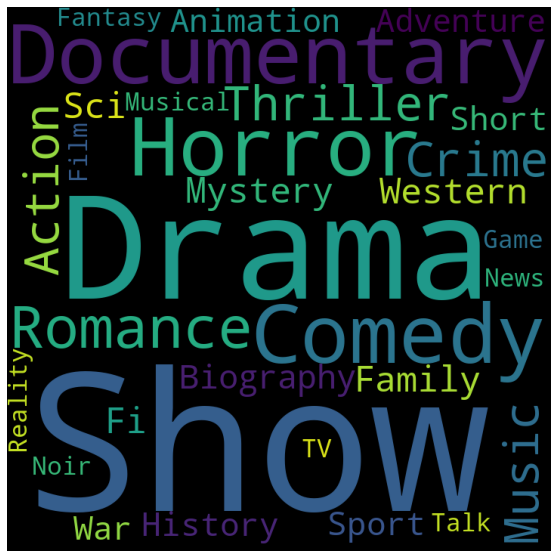

In [279]:
plt.subplots(figsize = (10,10))

wordcloud_genre = WordCloud (
                    background_color = 'black',
                    width = 720,
                    height = 720
                        ).generate(' '.join(count_genres_df['Genre']))
plt.imshow(wordcloud_genre) 
plt.axis('off') 
plt.show()

### Mejores peliculas en cada servicio de streaming
#### Se toma de referencia la calificación de IMDB superior o igual a 8.

## Netflix

In [280]:
data_netflix_best = data_netflix[data_netflix['IMDb']>=8]
data_netflix_best = data_netflix_best[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')[:10]

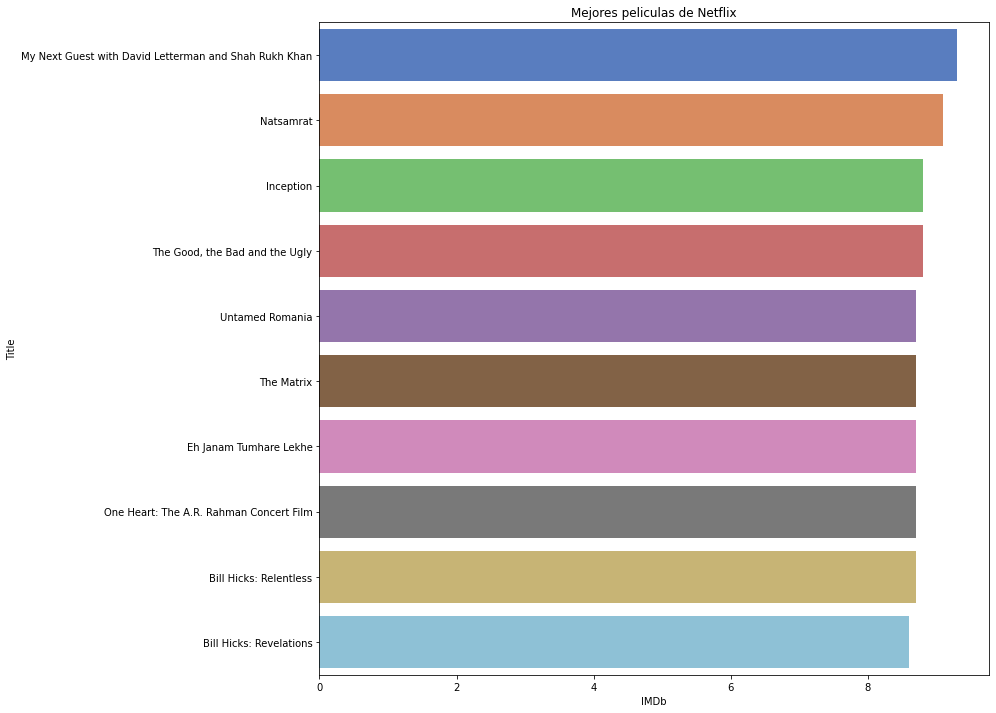

In [281]:
plt.figure(figsize=(12,12))
sns.barplot(x='IMDb',y='Title',data=data_netflix_best, palette='muted')
plt.title('Mejores peliculas de Netflix')
plt.show()

### Prime video

In [282]:
data_prime_best = data_prime[data_prime['IMDb']>=8]
data_prime_best = data_prime_best[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')

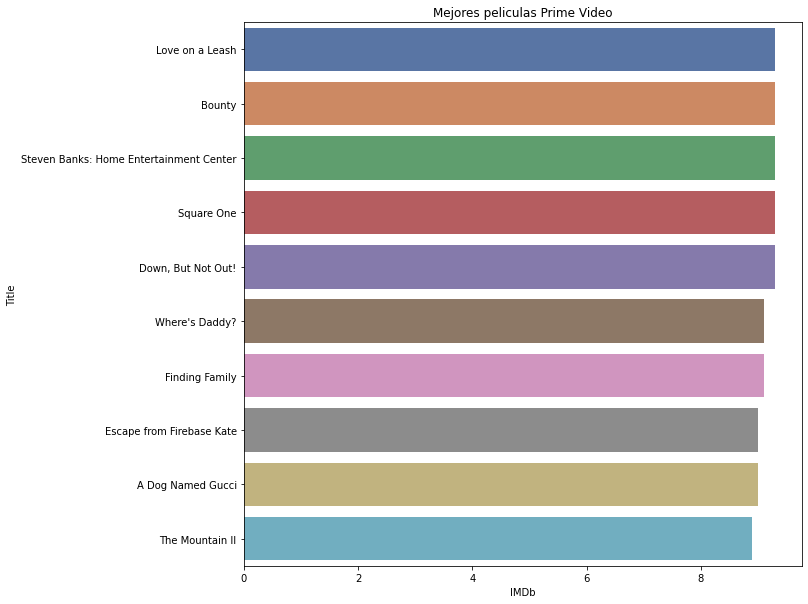

In [283]:
plt.figure(figsize=(10,10))
sns.barplot(x='IMDb',y='Title',data=data_prime_top, palette='deep')
plt.title('Mejores peliculas Prime Video')
plt.show()

## Disney+

In [284]:
data_disney_best = data_disney[data_disney['IMDb']>=8]
data_disney_best = data_disney_best[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')[:10]

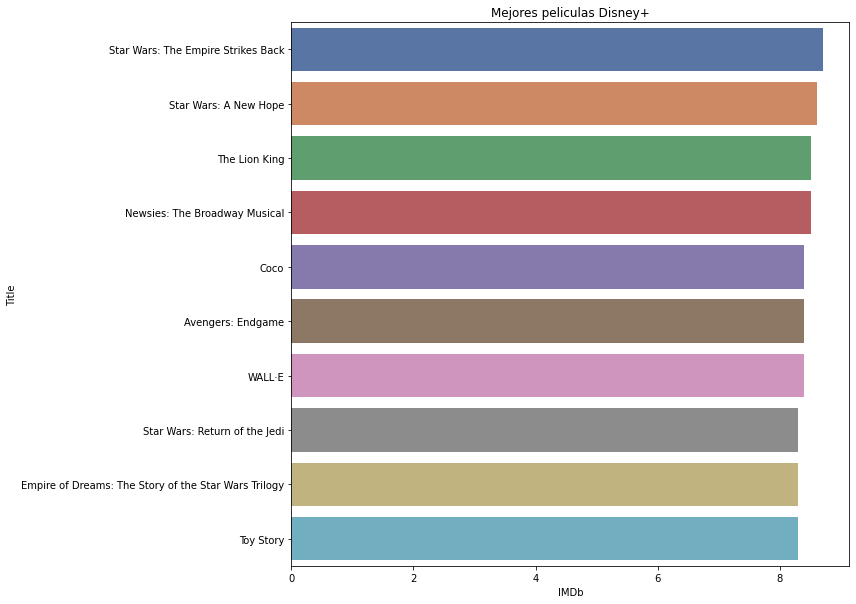

In [285]:
plt.figure(figsize=(10,10))
sns.barplot(x='IMDb',y='Title',data=data_disney_best, palette='deep')
plt.title('Mejores peliculas Disney+')
plt.show()

### Hulu

In [286]:
data_hulu_best = data_hulu[data_hulu['IMDb']>=8]
data_hulu_best = data_hulu_best[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')[:10]

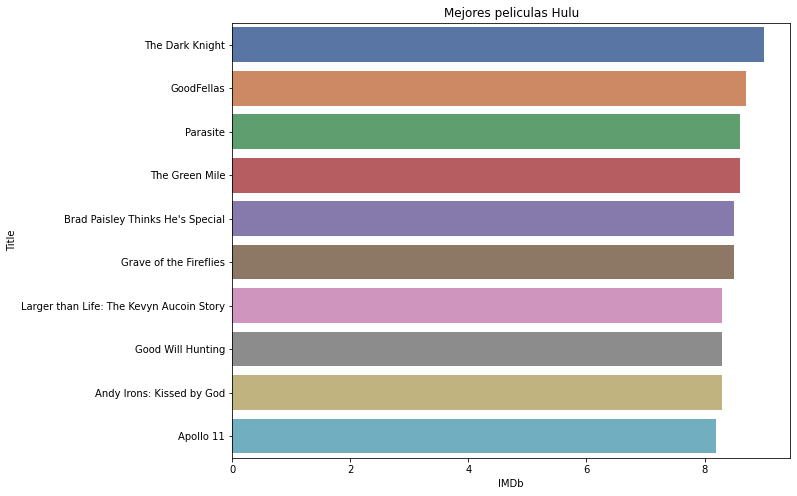

In [287]:
plt.figure(figsize=(10,8))
sns.barplot(x='IMDb',y='Title',data=data_hulu_best, palette='deep')
plt.title('Mejores peliculas Hulu')
plt.show()

### Promedio de duración de las obras en cada servicio.

In [288]:
minutes_netflix = round(data_netflix['Runtime'].sum()/data_netflix.shape[0],2)
minutes_hulu = round(data_hulu['Runtime'].sum()/data_hulu.shape[0],2)
minutes_prime = round(data_prime['Runtime'].sum()/data_prime.shape[0],2)
minutes_disney = round(data_disney['Runtime'].sum()/data_disney.shape[0],2)
print(minutes_netflix, minutes_hulu, minutes_prime, minutes_disney)

92.83 95.46 89.6 88.98


In [289]:
minutes_df = pd.DataFrame({
    'Streaming Platform' : ['Netflix','Prime Video','Disney+','Hulu'],
    'Duration' : [minutes_netflix, minutes_hulu, minutes_prime, minutes_disney]
})
minutes_df.head()

,Streaming Platform,Duration
0,Netflix,92.83
1,Prime Video,95.46
2,Disney+,89.60
3,Hulu,88.98


In [290]:
minutes_df.sort_values(ascending=False, by='Duration').iplot(kind="bar", x='Streaming Platform', 
                                                              xTitle='Plataforma Streaming ', 
                                                              yTitle='Duración', title='Duración por servicio', color='blue')

### Elaborando un sistema de recomendaciones para Netflix

In [291]:
data_recc = pd.read_csv('C:/Users/54115/Desktop/Proyectos EANT/netflix/netflix_titles.csv')

data_recc.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...


In [292]:
data_recc.info

<bound method DataFrame.info of        show_id     type                                        title  \
0     81145628    Movie      Norm of the North: King Sized Adventure   
1     80117401    Movie                   Jandino: Whatever it Takes   
2     70234439  TV Show                           Transformers Prime   
3     80058654  TV Show             Transformers: Robots in Disguise   
4     80125979    Movie                                 #realityhigh   
...        ...      ...                                          ...   
6229  80000063  TV Show                                 Red vs. Blue   
6230  70286564  TV Show                                        Maron   
6231  80116008    Movie       Little Baby Bum: Nursery Rhyme Friends   
6232  70281022  TV Show  A Young Doctor's Notebook and Other Stories   
6233  70153404  TV Show                                      Friends   

                      director  \
0     Richard Finn, Tim Maltby   
1                          NaN   
2

In [293]:
data_recc1 = data_recc[['title','director','cast','listed_in','description']]
data_recc1.head(10)

,title,director,cast,listed_in,description
0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Jandino: Whatever it Takes,NaN,Jandino Asporaat,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",Kids' TV,"With the help of three human allies, the Autob..."
3,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",Kids' TV,When a prison ship crash unleashes hundreds of...
4,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",Comedies,When nerdy high schooler Dani finally attracts...
5,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...","Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,Fire Chasers,NaN,NaN,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [294]:
!pip install rake_nltk
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from rake_nltk import Rake

In [295]:
rake = Rake()

In [296]:
data_recc['title']

0           Norm of the North: King Sized Adventure
1                        Jandino: Whatever it Takes
2                                Transformers Prime
3                  Transformers: Robots in Disguise
4                                      #realityhigh
                           ...                     
6229                                   Red vs. Blue
6230                                          Maron
6231         Little Baby Bum: Nursery Rhyme Friends
6232    A Young Doctor's Notebook and Other Stories
6233                                        Friends
Name: title, Length: 6234, dtype: object

In [297]:
data_recc1['director'] = data_recc1['director'].fillna(' ')
data_recc1['director'] = data_recc1['director'].astype(str)
data_recc1['cast'] = data_recc1['cast'].fillna(' ')
data_recc1['cast'] = data_recc1['cast'].astype(str)

In [298]:
data_recc1['key_notes'] = ''
for index,row in data_recc1.iterrows():
    plot = row['description']
    
    rake.extract_keywords_from_text(plot)
    keyword_score = rake.get_word_degrees()
    
    genre = ''.join(row['listed_in'].split(',')).lower()
    director = ''.join(row['director'].replace(' ','').split(',')).lower()
    cast = ' '.join(row['cast'].replace(' ','').split(',')).lower()
    keyword_score = ' '.join(list(keyword_score.keys()))
    
    row['key_notes'] = genre + ' ' + ' ' + director + ' ' + cast + ' ' + keyword_score

recommend = data_recc1[['title','key_notes']]
recommend.head()

,title,key_notes
0,Norm of the North: King Sized Adventure,children & family movies comedies richardfinn...
1,Jandino: Whatever it Takes,stand-up comedy jandinoasporaat fire rousing...
2,Transformers Prime,kids' tv petercullen sumaleemontano frankwel...
3,Transformers: Robots in Disguise,kids' tv willfriedle darrencriss constancezi...
4,#realityhigh,comedies fernandolebrija nestacooper katewals...


In [299]:
countv = CountVectorizer()
count_mat = countv.fit_transform(recommend['key_notes'])
cosine_sim = cosine_similarity(count_mat,count_mat)
print(cosine_sim)

[[1.         0.         0.         ... 0.0942809  0.03086067 0.03390318]
 [0.         1.         0.04472136 ... 0.         0.         0.        ]
 [0.         0.04472136 1.         ... 0.         0.10141851 0.07427814]
 ...
 [0.0942809  0.         0.         ... 1.         0.         0.        ]
 [0.03086067 0.         0.10141851 ... 0.         1.         0.21971769]
 [0.03390318 0.         0.07427814 ... 0.         0.21971769 1.        ]]


In [300]:
indices = pd.Series(recommend['title'])
def recommend_movie(name):
    movie=[]
    idx = indices[indices == name].index[0]
    sort_index = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    recommendation_5= sort_index.iloc[1:5]
    for i in recommendation_5.index:
        movie.append(indices[i])
    return movie

In [301]:
def rec():
    try:
        i = 1
        while(i > 0):
            name = input("Enter The Name of a Movie or Tv Show: ")
            if name.lower() == 'quit':
                break
            else:
                print(recommend_movie(name))

    except KeyboardInterrupt:
        print("The movie or Tv Show does not exist\n")
        rec()

    except IndexError:
        print("The movie or Tv Show does not exist\n")
        rec()
        

print("To exit Enter \"quit\" \n")
rec()

To exit Enter "quit" 

Enter The Name of a Movie or Tv Show: Toy Story
The movie or Tv Show does not exist

Enter The Name of a Movie or Tv Show: Toy story
The movie or Tv Show does not exist

Enter The Name of a Movie or Tv Show: toy
The movie or Tv Show does not exist

Enter The Name of a Movie or Tv Show: Toy
The movie or Tv Show does not exist

Enter The Name of a Movie or Tv Show: Toy Story
The movie or Tv Show does not exist

Enter The Name of a Movie or Tv Show: Naruto
['Saint Seiya: The Lost Canvas', 'Naruto Shippuden : Blood Prison', 'Naruto Shippuden: The Movie', 'Naruto Shippûden the Movie: Bonds']
Enter The Name of a Movie or Tv Show: good people
The movie or Tv Show does not exist

Enter The Name of a Movie or Tv Show: Good People
['Blood Money', 'Romeo Ranjha', 'Limitless', 'Spider-Man 3']
Enter The Name of a Movie or Tv Show: Blood Money
['Sadece Sen', 'Yes or No', 'Yes or No 2', 'Mandobasar Galpo']
Enter The Name of a Movie or Tv Show: Her
["The Time Traveler's Wife", '